1. Add one more hidden layer to autoencoder

In [1]:

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded1 = Dense(encoding_dim, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(784, activation='sigmoid')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



from keras.datasets import mnist, fashion_mnist
import numpy as np


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.7152 - val_loss: 0.7112
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.7098 - val_loss: 0.7059
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.7045 - val_loss: 0.7007
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.6993 - val_loss: 0.6957
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.6943 - val_loss: 0.6908


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


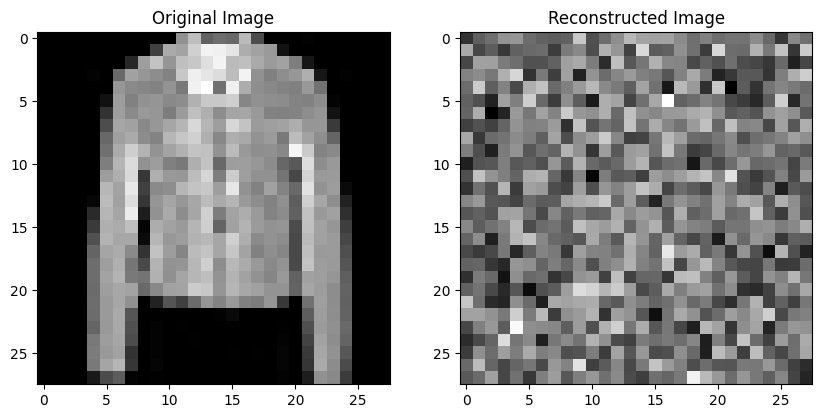

In [2]:
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize reconstructed image and original image
import matplotlib.pyplot as plt

# Choose an index of a test image to visualize
idx = 10

# Reshape the test image
test_img = x_test[idx].reshape(28, 28)

# Reshape the reconstructed image
reconstructed_img = decoded_imgs[idx].reshape(28, 28)

# Plot the original and reconstructed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')
plt.show()


3. Repeat the question 2 on the denoisening autoencoder

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.0016 - loss: 0.6156 - val_accuracy: 0.0027 - val_loss: 0.6139
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.0013 - loss: 0.6128 - val_accuracy: 0.0028 - val_loss: 0.6113
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.0015 - loss: 0.6106 - val_accuracy: 0.0029 - val_loss: 0.6087
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.0014 - loss: 0.6078 - val_accuracy: 0.0031 - val_loss: 0.6062
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.0013 - loss: 0.6051 - val_accuracy: 0.0033 - val_loss: 0.6038
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.0015 - loss: 0.6030 - val_accuracy: 0.0032 - val_loss: 0.6014
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.0014 - loss: 0.6006 - val_accuracy: 0.0031 - val_loss: 0.5991
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.0013 - loss: 0.5984 - val

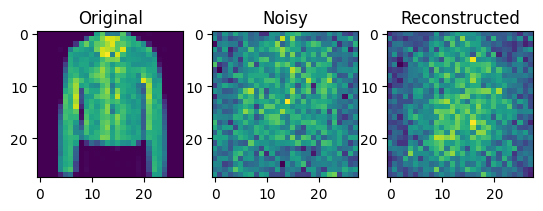

In [11]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history1 = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Predict on the noisy test data to get the reconstructed images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Define img_to_display and set it to a valid index
img_to_display = 10  # For example, display the 10th image

# Display the original, noisy, and reconstructed images side by side
plt.subplot(1, 3, 1)
plt.imshow(x_test[img_to_display].reshape(28, 28))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[img_to_display].reshape(28, 28))
plt.title('Noisy')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_imgs[img_to_display].reshape(28, 28))
plt.title('Reconstructed')

plt.show()

4. plot loss and accuracy using the history object

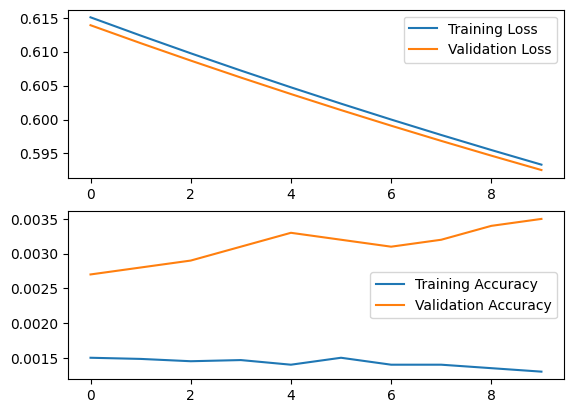

In [12]:
# Plot the loss and accuracy over epochs
plt.subplot(2, 1, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()